# Programming Exercise 1: Linear Regression with One Variable

This uses the Octave code from Programming Exercise 1 and implements it in Python.

Required libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Load the data from the text file using numpy. 

The text file is delimited by commas between the data so we set the delimiter to ','.

In [2]:
data1 = np.loadtxt("ex1\ex1data1.txt", delimiter=',')

## Set the constant variables.

alpha is our learning rate, iterations is the number of iterations/steps that we will use for gradient descent.

In [3]:
iterations = 1500
alpha = 0.01

## Compute Cost Function

**θ** is our *parameter* or *weight*, we update θ to minimize our cost function, *J*

**h** is our *hypothesis* given by the formula below. h should try to best fit to our data y.

\begin{equation*}
h = X * \theta
\end{equation*}

The squared error finds the squared difference beween our hypothesis value, *h*, and our real value, *y*. Summing the squared error helps find how far away our predicted regression line is from the data.

\begin{equation*}
\sum_{}^m (h-y)^2
\end{equation*}

1/m is chosen to give the mean(average) of the results. The mean is halved as a convenience for gradient descent as the derivation term of the square function will cancel out the 1/2 term.

\begin{equation*}
\frac{1}{2m}
\end{equation*}

Combining all of the information about, the cost function, *J*, is given below. J measures the accuracy of the hypothesis. 

\begin{equation*}
J(\theta) = \frac{1}{2m} \sum_{}^m (h-y)^2
\end{equation*}

In [4]:
def computeCost(X, y, theta):
    m = np.size(y)
    h = np.matmul(X, theta)
    # np.square is the element-wise square
    squaredErrors = np.square(h - y)
    J = 1/(2*m) * sum(squaredErrors)
    return J

## Run Gradient Descent

Gradient descent helps to minimize the cost function. The idea is that you start with some parameters, θ, and keeping changing them to reduce J until you reach a local minimum. A good example of gradient descent is that you are standing on a hill and take one step towards the bottom of the hill. How large of a step you take is determined by the learning rate, *α*.

If α is too small, gradient descent can be very slow to converge (baby steps). If α is too large, gradient descent can fail to converge and even diverge (giant steps) 

The formula for gradient descent is repeated until convergence. 

\begin{equation*}
\theta_j := \theta_j - α \frac{\partial}{\partial \theta_j} J(\theta_j)
\end{equation*}

The partial derivative for each j is given by the term, delta: *δ*. The derivative is the slope of the cost function. All θ should be simultaneously updated. The vectorized form for δ is given below.

\begin{equation*}
\delta = \frac{1}{m} \sum_{}^m (h-y) * X
\end{equation*}

The vectorized form for the θ update is given by:

\begin{equation*}
\theta := \theta - \alpha \delta
\end{equation*}

This is repeated for the number of iterations defined above. The idea is that this is the number of iterations it will take for gradient descent to converge.

In [5]:
def gradientDescent(X, y, theta, alpha, iterations):
    m = np.size(y)
    
    for i in range(0, iterations):
        h = np.matmul(X, theta)
        delta = 1/m * X.transpose() * (h - y)
        theta = theta - alpha * delta
    return theta

The X matrix holds all the features from our data. In this example, we only have one feature. The y vector holds our recorded outcomes. [:,-1] refers to the last column of data1. Lastly, y is transposed to be a column vector from a row array. m is set total number of elements in the data which is the size of y.

In [6]:
X = data1[:,0]
y = data1[:,-1]
# convert y from an array to a matrix and transpose it correctly
y = np.asmatrix(y).transpose()
m = np.size(y)

It can be helpful to visualize what data we have to work with. Below the first 5 rows of X are printed and the first 5 elements of y. A plot of the data is also shown.

In [7]:
print(X[:5]) # first 5 rows of X

[6.1101 5.5277 8.5186 7.0032 5.8598]


In [8]:
print(y[:5]) # print the first 5 elements of y

[[17.592 ]
 [ 9.1302]
 [13.662 ]
 [11.854 ]
 [ 6.8233]]


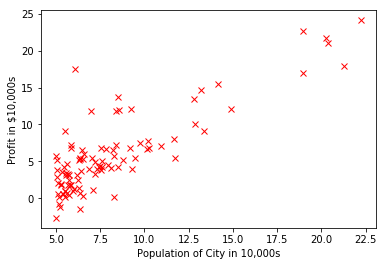

In [9]:
plt.plot(X, y, 'rx') # 'rx' means "red x" marker
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

Add a bias column of 1's onto the front of the X matrix. This is our θ<sub>0</sub>.

In [10]:
# concatenates a column of length m on ones as the first column in X
X = np.c_[np.ones(m), X]
print(X[:1])

[[1.     6.1101]]


Create theta as a matrix of zeros that is the same dimensions as our X matrix.

In [11]:
theta = np.zeros([X.shape[1],1])
print(theta)

[[0.]
 [0.]]


Compute our cost function, J.

In [12]:
J = computeCost(X, y, theta)
print("Our cost is " + str(J))

Our cost is [[32.07273388]]


Update θ<sub>0</sub> and θ<sub>1</sub> by performing gradient descent.

In [13]:
theta = gradientDescent(X, y, theta, alpha, iterations)
print(theta)

[[-3.63029144]
 [ 1.16636235]]


Plot our points and see how well our regression line matches our data.

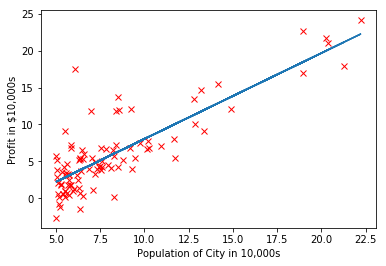

In [14]:
plt.plot(X[:,1], y, 'rx') # 'rx' means "red x" marker
plt.plot(X[:,1], X * theta)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()